# EDA OF NOSHOW APPOINTMENTS IN MAY 2016.

#### INTRODUCTION

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment.

#### QUESTIONS

From this data, we seek to answer the following questions:
1. Which gender; male or female had a higher number of no shows?
2. Were most no shows from patients under scolarship or not?
3. Did the no shows receive SMS for their appointments?
4. What was the age range of the no- shows?

#### DATA WRANGLING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv(r'C:\Users\Sherry\Downloads\noshowappointments-kagglev2-may-2016 (1).csv')
df.head()                 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.shape

(110527, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# converting date time into correct format
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.ScheduledDay.head(5)

0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
2   2016-04-29 16:19:04+00:00
3   2016-04-29 17:29:31+00:00
4   2016-04-29 16:07:23+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

In [9]:
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df.AppointmentDay.head(5)

0   2016-04-29 00:00:00+00:00
1   2016-04-29 00:00:00+00:00
2   2016-04-29 00:00:00+00:00
3   2016-04-29 00:00:00+00:00
4   2016-04-29 00:00:00+00:00
Name: AppointmentDay, dtype: datetime64[ns, UTC]

In [10]:
# creating a new df with only No show Appointments.
df1 = df.loc[["Yes" in title for title in df["No-show"]], :]
df1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


#### EDA

F    13.0
M     7.0
Name: Gender, dtype: float64


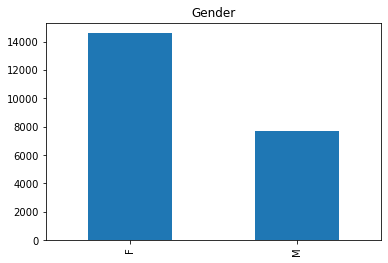

In [12]:
#Which gender had more no shows?
print(round(df1.Gender.value_counts()/len(df)*100))
#
df1.Gender.value_counts().plot(kind="bar")
plt.title("Gender");

0    18.0
1     2.0
Name: Scholarship, dtype: float64


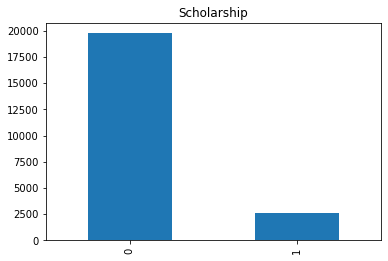

In [13]:
# Self sponsored vs scholarship no shows?
print(round(df1.Scholarship.value_counts()/len(df)*100))
#
df1.Scholarship.value_counts().plot(kind="bar")
plt.title("Scholarship");


0    11.0
1     9.0
Name: SMS_received, dtype: float64


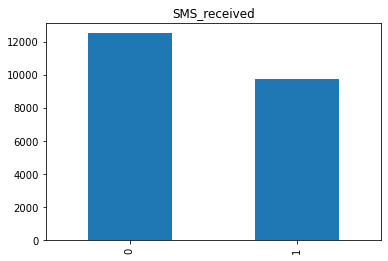

In [14]:
# SMS vs NO- SMS?
print(round(df1.SMS_received.value_counts()/len(df)*100))
#
df1.SMS_received.value_counts().plot(kind="bar")
plt.title("SMS_received");

C:\Users\Sherry\AppData\Local\Temp/ipykernel_13740/3088698879.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


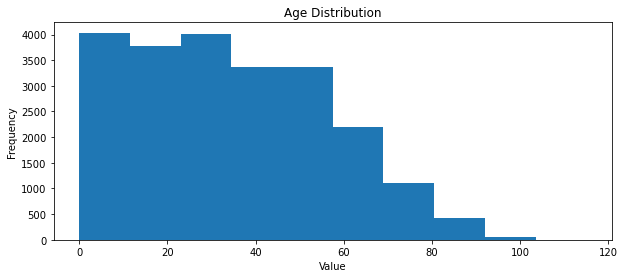

In [15]:
# Age distribution of No-shows

# variable to examine
var_data = df1['Age']
# Create a Figure
fig = plt.figure(figsize=(10,4))
# Plot a histogram
plt.hist(var_data)
# Add titles and labels
plt.title('Age Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
# Show figure
fig.show()

#### CONCLUSIONS

From the above, we can conclude that:
1. More females missed their appointments in comparison to their male counterparts.
2. Self sponsored patients missed more appointments compared to those under scholarship.
3. Most no shows had received no SMS with their appointment details.
4. Most no show appointments were aged 1-10 or 20-30.

#### LIMITATIONS

The project went smoothly, with the dataset proving easy to work with.
Snippets of my code came from different projects on my github repo https://github.com/Shee36